<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='import_libraries'></a>
[Back to the top](#table_of_contents)

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to the top](#table_of_contents)

In [50]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [51]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# 2. Data exploration <a id='data_exploration'></a>
[Back to the top](#table_of_contents)

In [52]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [53]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]
taxi_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,193,193,2,55.55
...,...,...,...,...,...,...,...,...,...
7696612,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,142,95,0,0.00
7696613,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,48,213,0,54.60
7696614,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,159,246,0,54.60
7696615,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,265,265,0,0.00


In [54]:
taxi_data.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [55]:
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7696617,7696617,7.667945e+06,7.696617e+06,7.667945e+06,7.696617e+06,7.696617e+06,7.696617e+06,7.696617e+06
mean,2019-01-17 00:56:26.319621,2019-01-17 01:12:59.384514,1.567032e+00,2.830146e+00,1.058371e+00,1.654005e+02,1.636289e+02,1.286947e+00,1.581065e+01
min,2001-02-02 14:55:07,2001-02-02 15:07:27,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.628000e+02
25%,2019-01-09 17:39:43,2019-01-09 17:55:48,1.000000e+00,9.000000e-01,1.000000e+00,1.270000e+02,1.130000e+02,1.000000e+00,8.300000e+00
50%,2019-01-16 22:15:35,2019-01-16 22:30:08,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.130000e+01
75%,2019-01-24 19:12:20,2019-01-24 19:27:57,2.000000e+00,2.830000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.660000e+01
max,2088-01-24 00:25:39,2088-01-24 07:28:25,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232617e+05
std,NaN,NaN,1.224420e+00,3.774548e+00,6.780839e-01,6.643992e+01,7.040929e+01,4.789416e-01,2.618117e+02


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

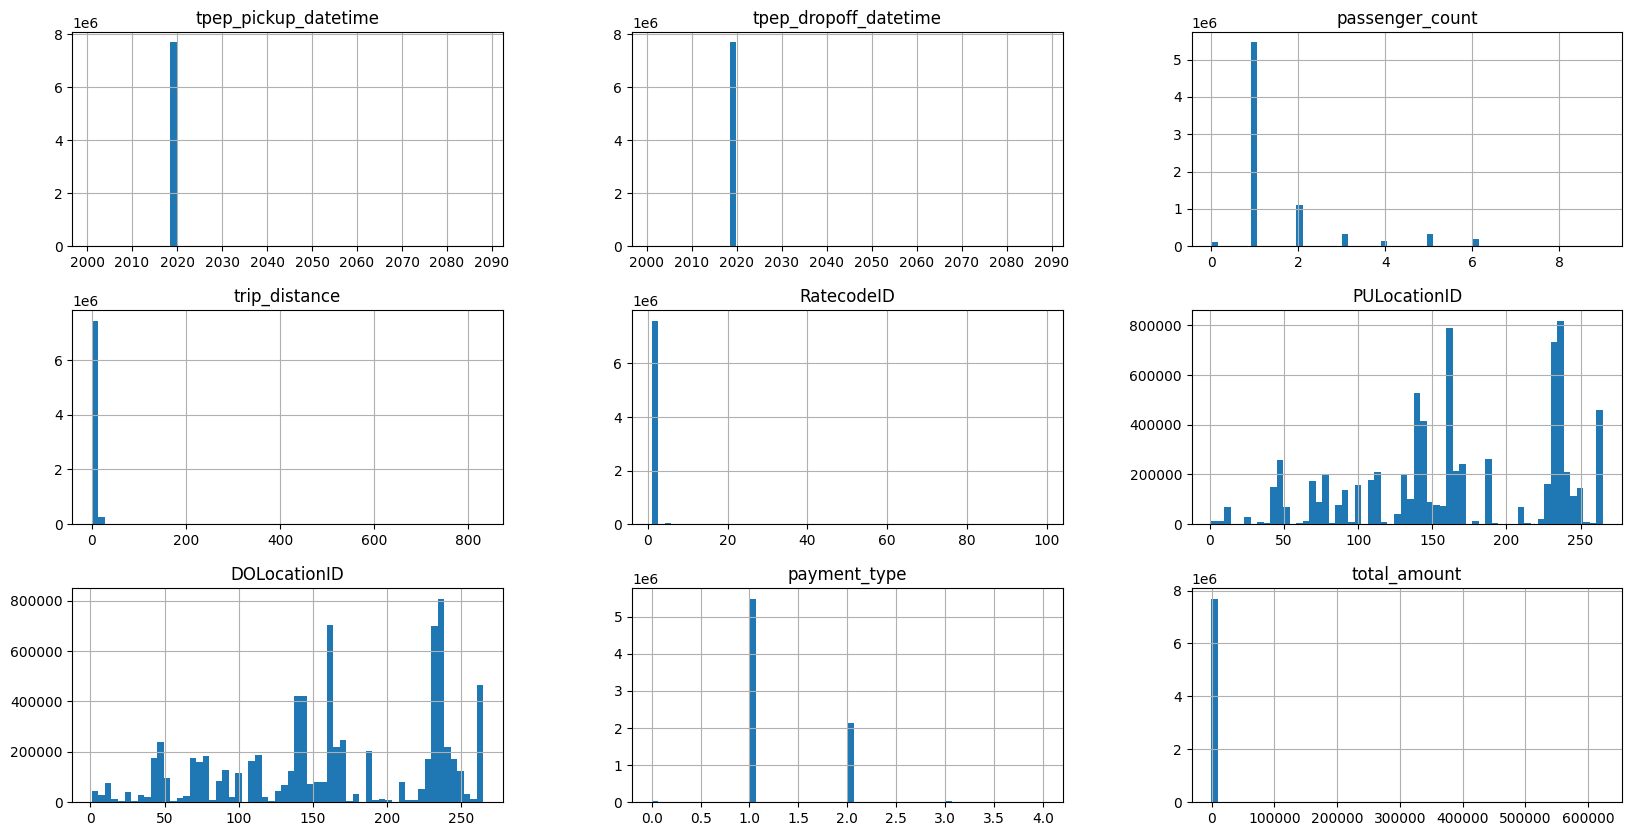

In [56]:
taxi_data.hist(bins=60, figsize = (20,10))

In [57]:
zero_passangers = taxi_data[taxi_data['passenger_count'] == 0]
zero_passangers

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
156,2019-01-01 00:32:24,2019-01-01 00:33:21,0.0,5.3,1.0,50,50,1,4.55
228,2019-01-01 00:00:50,2019-01-01 00:31:48,0.0,18.0,2.0,132,140,1,59.80
229,2019-01-01 00:38:32,2019-01-01 01:09:51,0.0,8.9,1.0,229,37,1,38.50
298,2019-01-01 00:45:19,2019-01-01 00:55:53,0.0,1.0,1.0,107,170,2,9.30
905,2019-01-01 00:20:15,2019-01-01 00:26:42,0.0,0.7,1.0,90,249,1,8.30
...,...,...,...,...,...,...,...,...,...
7667705,2019-01-31 23:56:07,2019-02-01 00:13:46,0.0,2.8,1.0,264,264,1,16.30
7667734,2019-01-31 23:36:42,2019-01-31 23:57:43,0.0,4.8,1.0,161,13,1,20.80
7667765,2019-01-31 23:06:23,2019-01-31 23:18:20,0.0,3.2,1.0,68,239,1,15.95
7667917,2019-01-31 23:06:51,2019-01-31 23:15:06,0.0,1.4,1.0,162,186,2,8.80


In [58]:
big_distance = taxi_data[taxi_data['trip_distance'] > 100]
big_distance

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
11081,2019-01-01 00:41:25,2019-01-01 03:47:24,1.0,128.73,5.0,50,265,1,453.44
56478,2019-01-01 04:17:02,2019-01-01 06:33:31,1.0,119.80,1.0,163,265,1,330.30
1128063,2019-01-06 08:26:47,2019-01-06 11:00:54,1.0,113.71,1.0,100,265,2,0.00
1144939,2019-01-06 09:58:04,2019-01-06 12:35:10,3.0,142.88,5.0,222,265,1,327.38
1369064,2019-01-07 12:12:10,2019-01-07 14:59:17,1.0,108.50,4.0,132,265,2,498.80
2567443,2019-01-11 23:04:43,2019-01-11 23:28:43,2.0,144.20,1.0,211,229,2,18.80
2841024,2019-01-12 23:21:48,2019-01-12 23:29:14,1.0,100.80,1.0,141,162,3,8001.10
2841025,2019-01-12 23:30:17,2019-01-12 23:30:22,1.0,100.80,1.0,162,162,1,9.30
2889446,2019-01-13 06:48:39,2019-01-13 08:32:47,1.0,109.90,5.0,132,265,2,375.80
3421033,2019-01-15 13:36:57,2019-01-15 15:57:00,1.0,107.80,4.0,132,265,3,501.56


<Axes: xlabel='index', ylabel='total_amount'>

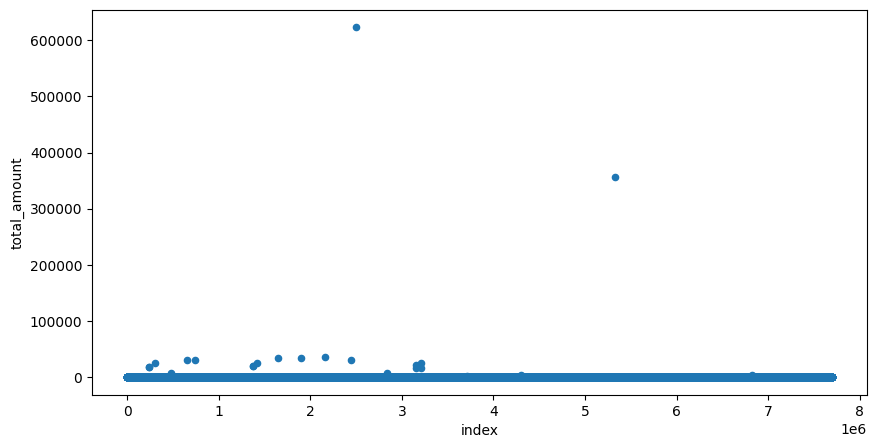

In [59]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x= 'index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

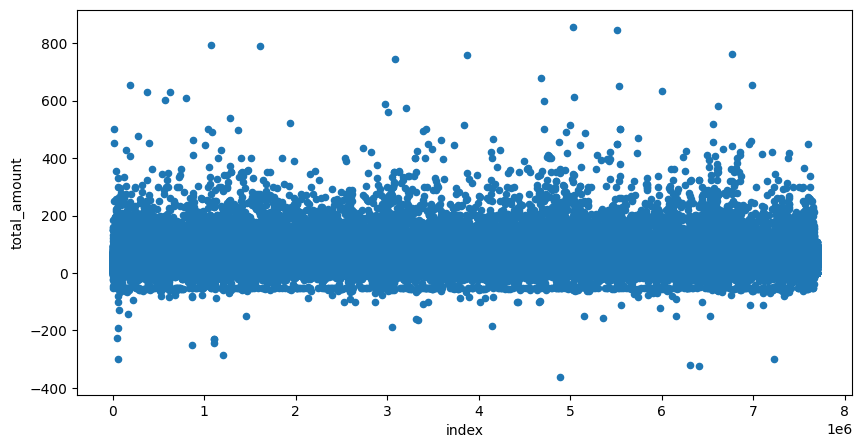

In [60]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x= 'index', figsize=(10,5))

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

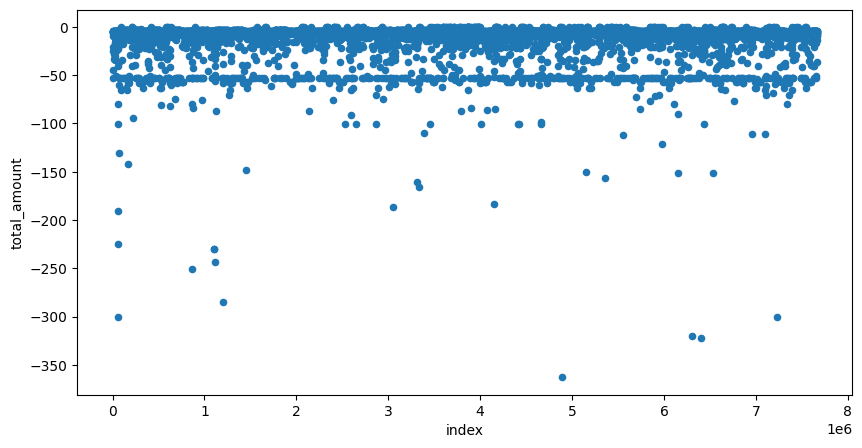

In [61]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x= 'index', figsize=(10,5))

In [62]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [63]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

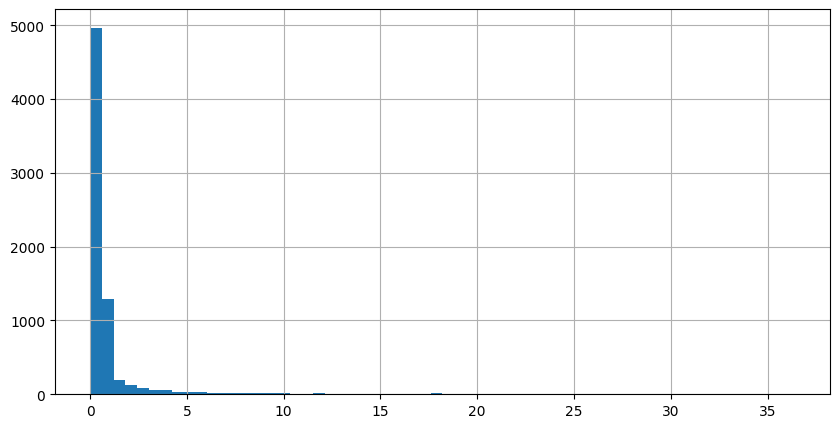

In [64]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))

In [65]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [66]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

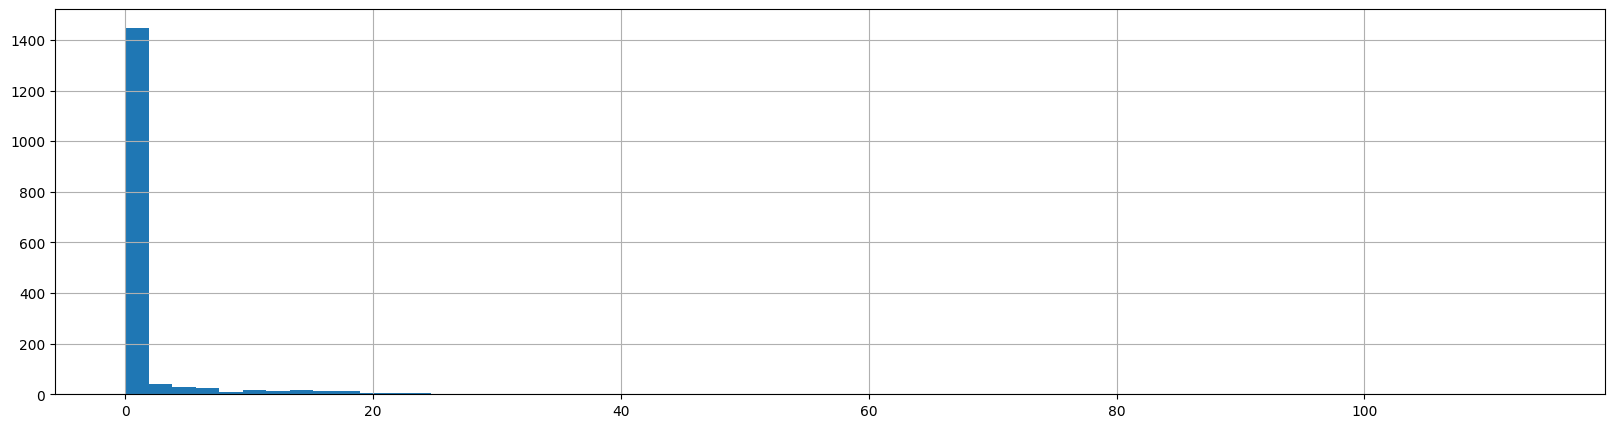

In [67]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(20,5))

In [68]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [69]:
expensive_trips = taxi_data[taxi_data['total_amount'] > 200]
print(expensive_trips.shape)

(1166, 9)


In [70]:
taxi_data['DOLocationID'].value_counts()

DOLocationID
236    334472
237    296350
161    294043
170    242439
162    232659
        ...  
204        45
30         25
2          16
99         12
105         4
Name: count, Length: 261, dtype: int64

In [71]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to the top](#table_of_contents)

* Clean total_amount <= 0, total_amount > 200

In [72]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']<200) & (taxi_data['total_amount']>0)&(taxi_data['passenger_count'].notna())]
print(taxi_data_filtered.shape)

(7658235, 9)


In [73]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to the top](#table_of_contents)

In [74]:
taxi_data_prepared = taxi_data_filtered.copy()

In [75]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [76]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [84]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)
#Why doesn't this work?
taxi_data_prepared.loc[:,'passenger_count'] = taxi_data_prepared['passenger_count'].astype('int64')

In [85]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [87]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [91]:
taxi_data_prepared[['tpep_pickup_datetime','transaction_date','transaction_month','transaction_day','transaction_hour']].head()

,tpep_pickup_datetime,transaction_date,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01,1,1,0
1,2019-01-01 00:59:47,2019-01-01,1,1,0
2,2018-12-21 13:48:30,2018-12-21,12,21,13
3,2018-11-28 15:52:25,2018-11-28,11,28,15
4,2018-11-28 15:56:57,2018-11-28,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

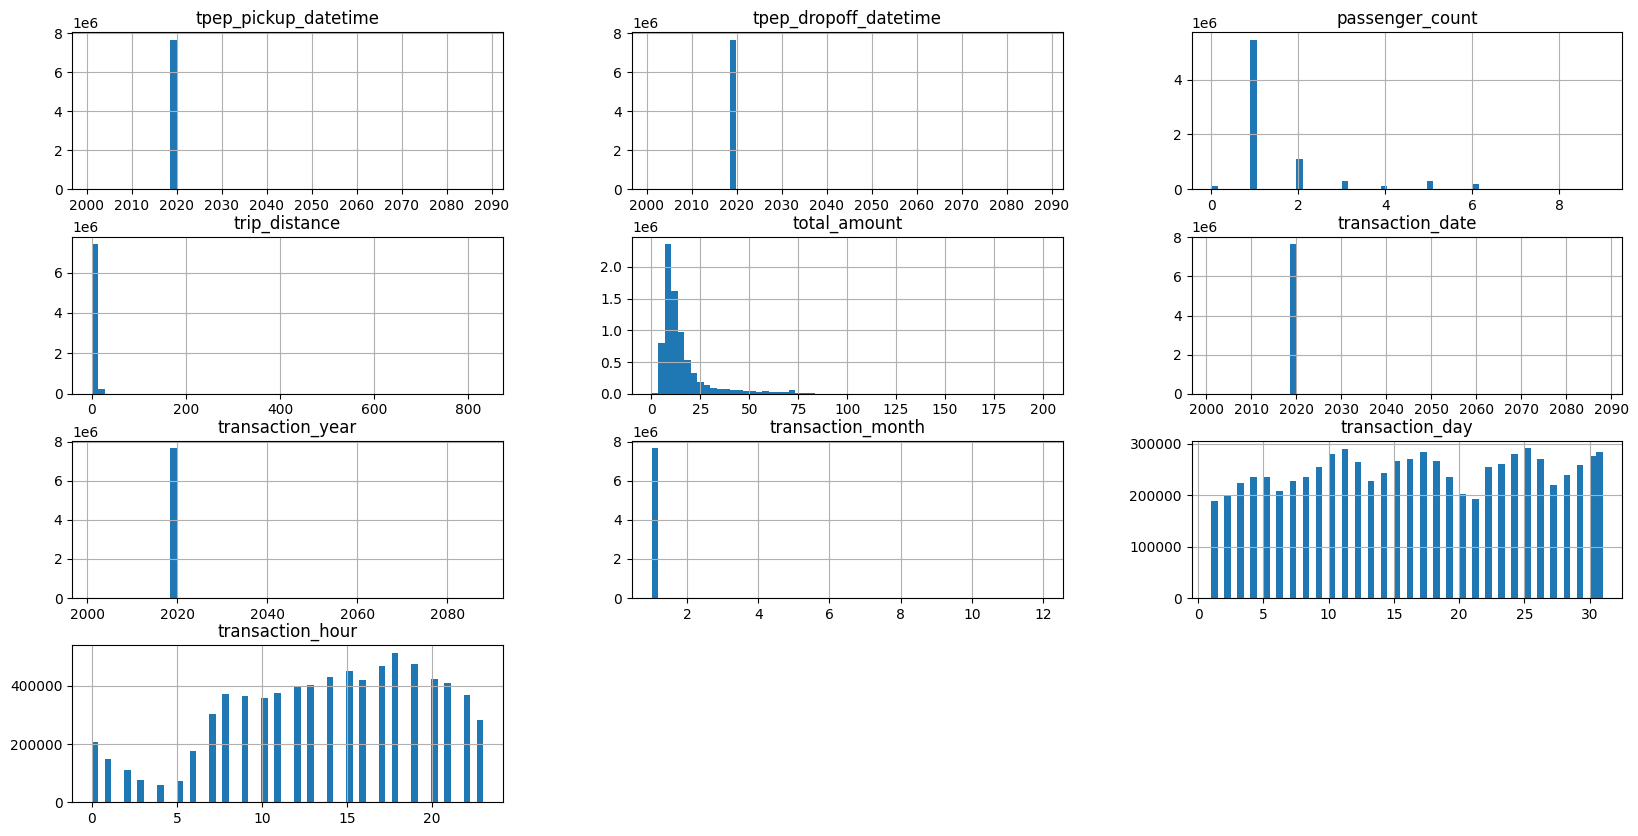

In [93]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [94]:
taxi_data_prepared = taxi_data_prepared[(taxi_data_prepared['transaction_year']==2019) & (taxi_data_prepared['transaction_month']==1)]